<a href="https://colab.research.google.com/github/HeikoViel/advancedhpc2023/blob/main/labwork3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numba
from numba import cuda
import matplotlib.pyplot as plt
import numpy as np
import numba
from numba import cuda

In [34]:
image = plt.imread("frog.jpg")
x_pixel = image.shape[0]
y_pixel = image.shape[1]

<ipython-input-42-9d93e8695a0a>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  new_image[i, 0] = new_image[i, 1] = new_image[i, 2] = np.uint8((image[i][0] + image[i][1] + image[i][2]) / 3)


(-0.5, 745.5, 738.5, -0.5)

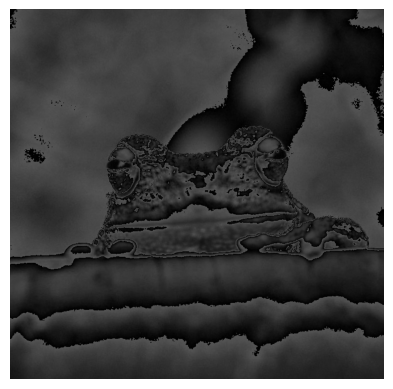

In [42]:
image = image.reshape(x_pixel * y_pixel, 3)
new_image = np.zeros([x_pixel*y_pixel, 3], dtype=np.uint8)

for i in range(x_pixel * y_pixel):
  new_image[i, 0] = new_image[i, 1] = new_image[i, 2] = np.uint8((image[i][0] + image[i][1] + image[i][2]) / 3)

new_image = new_image.reshape(x_pixel, y_pixel, 3)
fig, ax = plt.subplots()
ax.imshow(new_image)
ax.axis('off')

In [43]:
@cuda.jit
def grayscale(src, dst):
  tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
  g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
  dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g

In [52]:
devOutput = cuda.device_array((x_pixel * y_pixel, 3), np.uint8)


ERROR:numba.cuda.cudadrv.driver:Call to cuMemAlloc results in CUDA_ERROR_LAUNCH_FAILED


CudaAPIError: ignored